## Spectral function plots

In ``spectral_fun.py``, I have code that calculates spectral functions and makes various plots. This one plots the spectral function at various values of $k$ for a fixed $G$. Input the requested parameters. Here, I'm importing code to find the spectral function using all eigenstates or lanczos methods.

In [1]:
from spectral_fun import find_spectral_fun, find_degenerate_spectral_fun, lanczos_akw
from exact_diag import ham_op, ham_op_2, form_basis
import numpy as np
import matplotlib.pyplot as plt

## Comparing Lanczos and full methods

[0.39269908 1.17809725 1.96349541 2.74889357]


  0%|          | 0/1568 [00:00<?, ?it/s]

Combined 1 degenerate states
Fermi energy: 6.619780771387266
Creating at 7th spot
<vin|vout>
(0.7704083485611957+0j)
| |vin> - |vout> |
0.0
Equal?
True
Norms
0.8777290860859036
0.8777290860859036
<vin|vout>
(0.2295916514388044+0j)
| |vin> - |vout> |
0.0
Equal?
True
Norms
0.47915723039395364
0.47915723039395364
Finding creation matrix elts.
Finding annihilation matrix elts.


100%|██████████| 1568/1568 [00:00<00:00, 1979.39it/s]


Largest matrix elements: Creation
0.7689752835675309
7
Annihilation
0.19019079949657597
3
Recommended: kf = 7
Given: kf = 7


Performing Lanczos for c^+
Initial state created. Reducing to smaller basis
<vin|vout>
(0.7704083485611963+0j)
| |vin> - |vout> |
0.0
Equal?
True
Norms
0.877729086085904
0.8777290860859039
Performing 30th order Lanczos algorithm
0th step: ground state converged?
1.0
Beta? 0.20508217293103517
Reorthonormalizing 1 vectors!
1th step: ground state converged?
0.0003
Beta? 1.1044722536097644
Reorthonormalizing 2 vectors!
2th step: ground state converged?
0.0
Beta? 0.6640065903579893
Reorthonormalizing 3 vectors!
???????????????????
4th beta too small
STOPSTOPSTOPSTOP
???????????????????
0
3th step: ground state converged?
0.0
Beta? 3.185937290993667e-10
Lanczos coefficients
[9.9814e-01 1.8200e-03 4.0000e-05]
Eigenvalues
[32.28204567 36.90783276 41.03825864]

Performing Lanczos for c^-

Initial state created. Reducing to smaller basis
<vin|vout>
(0.22959165143880458+0j

/home/wholdhus/repos/so5-richardson-gaudin/spectral_fun.py:296: ComplexWarning: Casting complex values to real discards the imaginary part
  alphas[i] = np.vdot(hv, v)


(-40, 50)

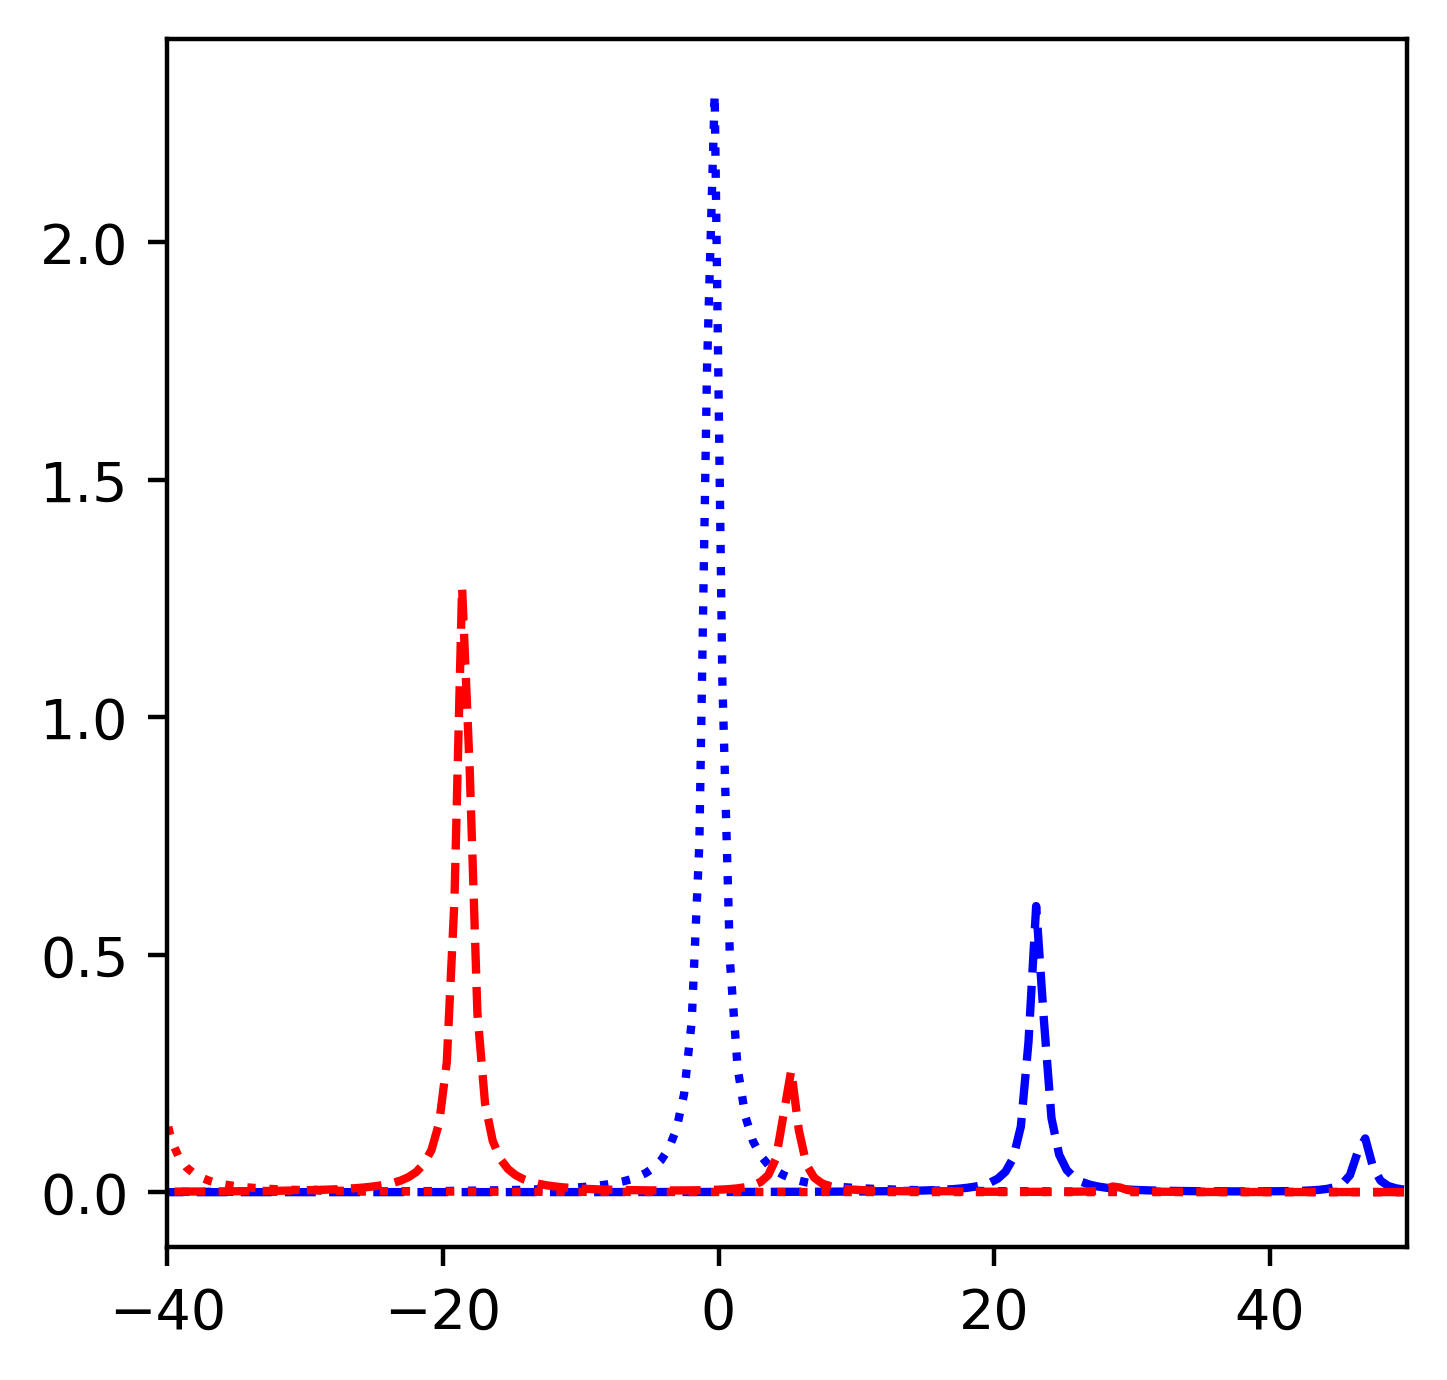

In [20]:
couplings=(1,1,1)

L = 4
N = 12
ks = np.arange(1, 2*L+1, 2)*0.5*np.pi/L

G = -1./np.sum(ks)
eta = .1
# kf = L + N//4 -1 

steps=1000
lanczos_steps = 1000
lanczos_states = 30
ap_all, am_all, omegas_all, ns = find_spectral_fun(L, N, G, ks, steps=steps, n_states=-999,
                                       eta=eta, couplings=couplings, subtract_ef=True)
ap_l, am_l, omegas = lanczos_akw(L, N, G, ks, lanczos_steps, omega_steps=omegas_all, eta=eta,
                                 couplings=couplings, lanczos_states=lanczos_states)
plt.figure(figsize=(4,4), dpi=400)
plt.plot(omegas_all, ap_all, ls=':', color='blue')
plt.plot(omegas_all, am_all, ls='--', color='blue')

plt.plot(omegas, ap_l, ls=':', color='red')
plt.plot(omegas, am_l, ls='--', color='red')

plt.xlim(-40, 50)

## Different couplings
We clearly see multiple peaks here. It would be interesting to know what the role of the different
interactions in our Hamiltonian have on these peaks.

### Only pairing

[0.39269908 1.17809725 1.96349541 2.74889357]


  0%|          | 0/1568 [00:00<?, ?it/s]

Combined 1 degenerate states
Fermi energy: 2.9291628296990737
Creating at 7th spot
<vin|vout>
(0.6403917646814117+0j)
| |vin> - |vout> |
0.0
Equal?
True
Norms
0.8002448154667493
0.8002448154667493
<vin|vout>
(0.3596082353185886+0j)
| |vin> - |vout> |
0.0
Equal?
True
Norms
0.5996734405646031
0.5996734405646031
Finding creation matrix elts.
Finding annihilation matrix elts.


100%|██████████| 1568/1568 [00:00<00:00, 1900.39it/s]


Largest matrix elements: Creation
0.6374995926137553
7
Annihilation
0.2440614695026063
1


(-10, 10)

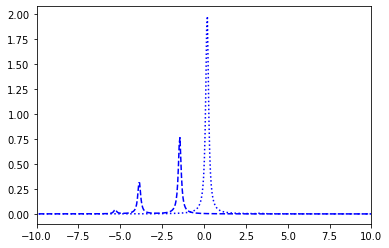

In [3]:
couplings=(1,0,0)
ap_pair, am_pair, omegas_pair, ns = find_spectral_fun(L, N, G, ks, steps=steps, k=None, n_states=-999,
                                       eta=eta, couplings=couplings, subtract_ef=True)
# ap_l, am_l, omegas = lanczos_akw(L, N, G, ks, order, kf=kf, steps=omegas, eta=eta,
#                                  couplings=couplings)

plt.plot(omegas_pair, ap_pair, ls=':', color='blue')
plt.plot(omegas_pair, am_pair, ls='--', color='blue')

# plt.plot(omegas, ap_l, ls=':', color='red', marker='x')
# plt.plot(omegas, am_l, ls='--', color='red', marker='x')
plt.xlim(-10, 10)


### Only spin

[0.39269908 1.17809725 1.96349541 2.74889357]


  0%|          | 0/1568 [00:00<?, ?it/s]

Combined 1 degenerate states
Fermi energy: 3.6508742751677836
Creating at 7th spot
<vin|vout>
(1+0j)
| |vin> - |vout> |
0.0
Equal?
True
Norms
1.0
1.0
<vin|vout>
(3.0429292879892487e-30+0j)
| |vin> - |vout> |
0.0
Equal?
True
Norms
1.7443994060963356e-15
1.7443994060963358e-15
Finding creation matrix elts.
Finding annihilation matrix elts.


100%|██████████| 1568/1568 [00:00<00:00, 1932.71it/s]


Largest matrix elements: Creation
1.0
1
Annihilation
7.95148781130626e-32
290


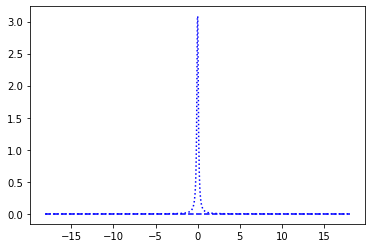

In [4]:
couplings=(0,1,0)
ap_spin, am_spin, omegas_spin, ns = find_spectral_fun(L, N, G, ks, steps=steps, k=None, n_states=-999,
                                       eta=eta, couplings=couplings,
                                       subtract_ef=True)
# ap_l, am_l, omegas = lanczos_akw(L, N, G, ks, order, kf=kf, steps=omegas, eta=eta,
#                                  couplings=couplings)

plt.plot(omegas_spin, ap_spin, ls=':', color='blue')
plt.plot(omegas_spin, am_spin, ls='--', color='blue')

# plt.plot(omegas, ap_l, ls=':', color='red', marker='x')
# plt.plot(omegas, am_l, ls=':', color='red', marker='x')



## Only density-density

[0.39269908 1.17809725 1.96349541 2.74889357]


/home/wholdhus/repos/so5-richardson-gaudin/exact_diag.py:31: RuntimeWarning: invalid value encountered in true_divide
  return v_out/np.linalg.norm(v_out)
  0%|          | 0/1568 [00:00<?, ?it/s]

Combined 1 degenerate states
Fermi energy: 6.14205907469406
Creating at 7th spot
<vin|vout>
(1+0j)
| |vin> - |vout> |
0.0
Equal?
True
Norms
1.0
1.0
<vin|vout>
0j
| |vin> - |vout> |
0.0
Equal?
True
Norms
0.0
0.0
Finding creation matrix elts.
Finding annihilation matrix elts.


100%|██████████| 1568/1568 [00:00<00:00, 1998.61it/s]


Largest matrix elements: Creation
1.0
1
Annihilation
0.0
0


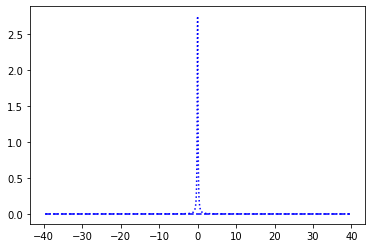

In [5]:
couplings=(0,0,1)
ap_dd, am_dd, omegas_dd, ns = find_spectral_fun(L, N, G, ks, steps=steps, k=None, n_states=-999,
                                       eta=eta, couplings=couplings, subtract_ef=True)
# ap_l, am_l, omegas = lanczos_akw(L, N, G, ks, order, kf=kf, steps=omegas, eta=eta,
#                                  couplings=couplings)

plt.plot(omegas_dd, ap_dd, ls=':', color='blue')
plt.plot(omegas_dd, am_dd, ls='--', color='blue')

# plt.plot(omegas, ap_l, ls=':', color='red')
# plt.plot(omegas, am_l, ls=':', color='red')

(-10, 10)

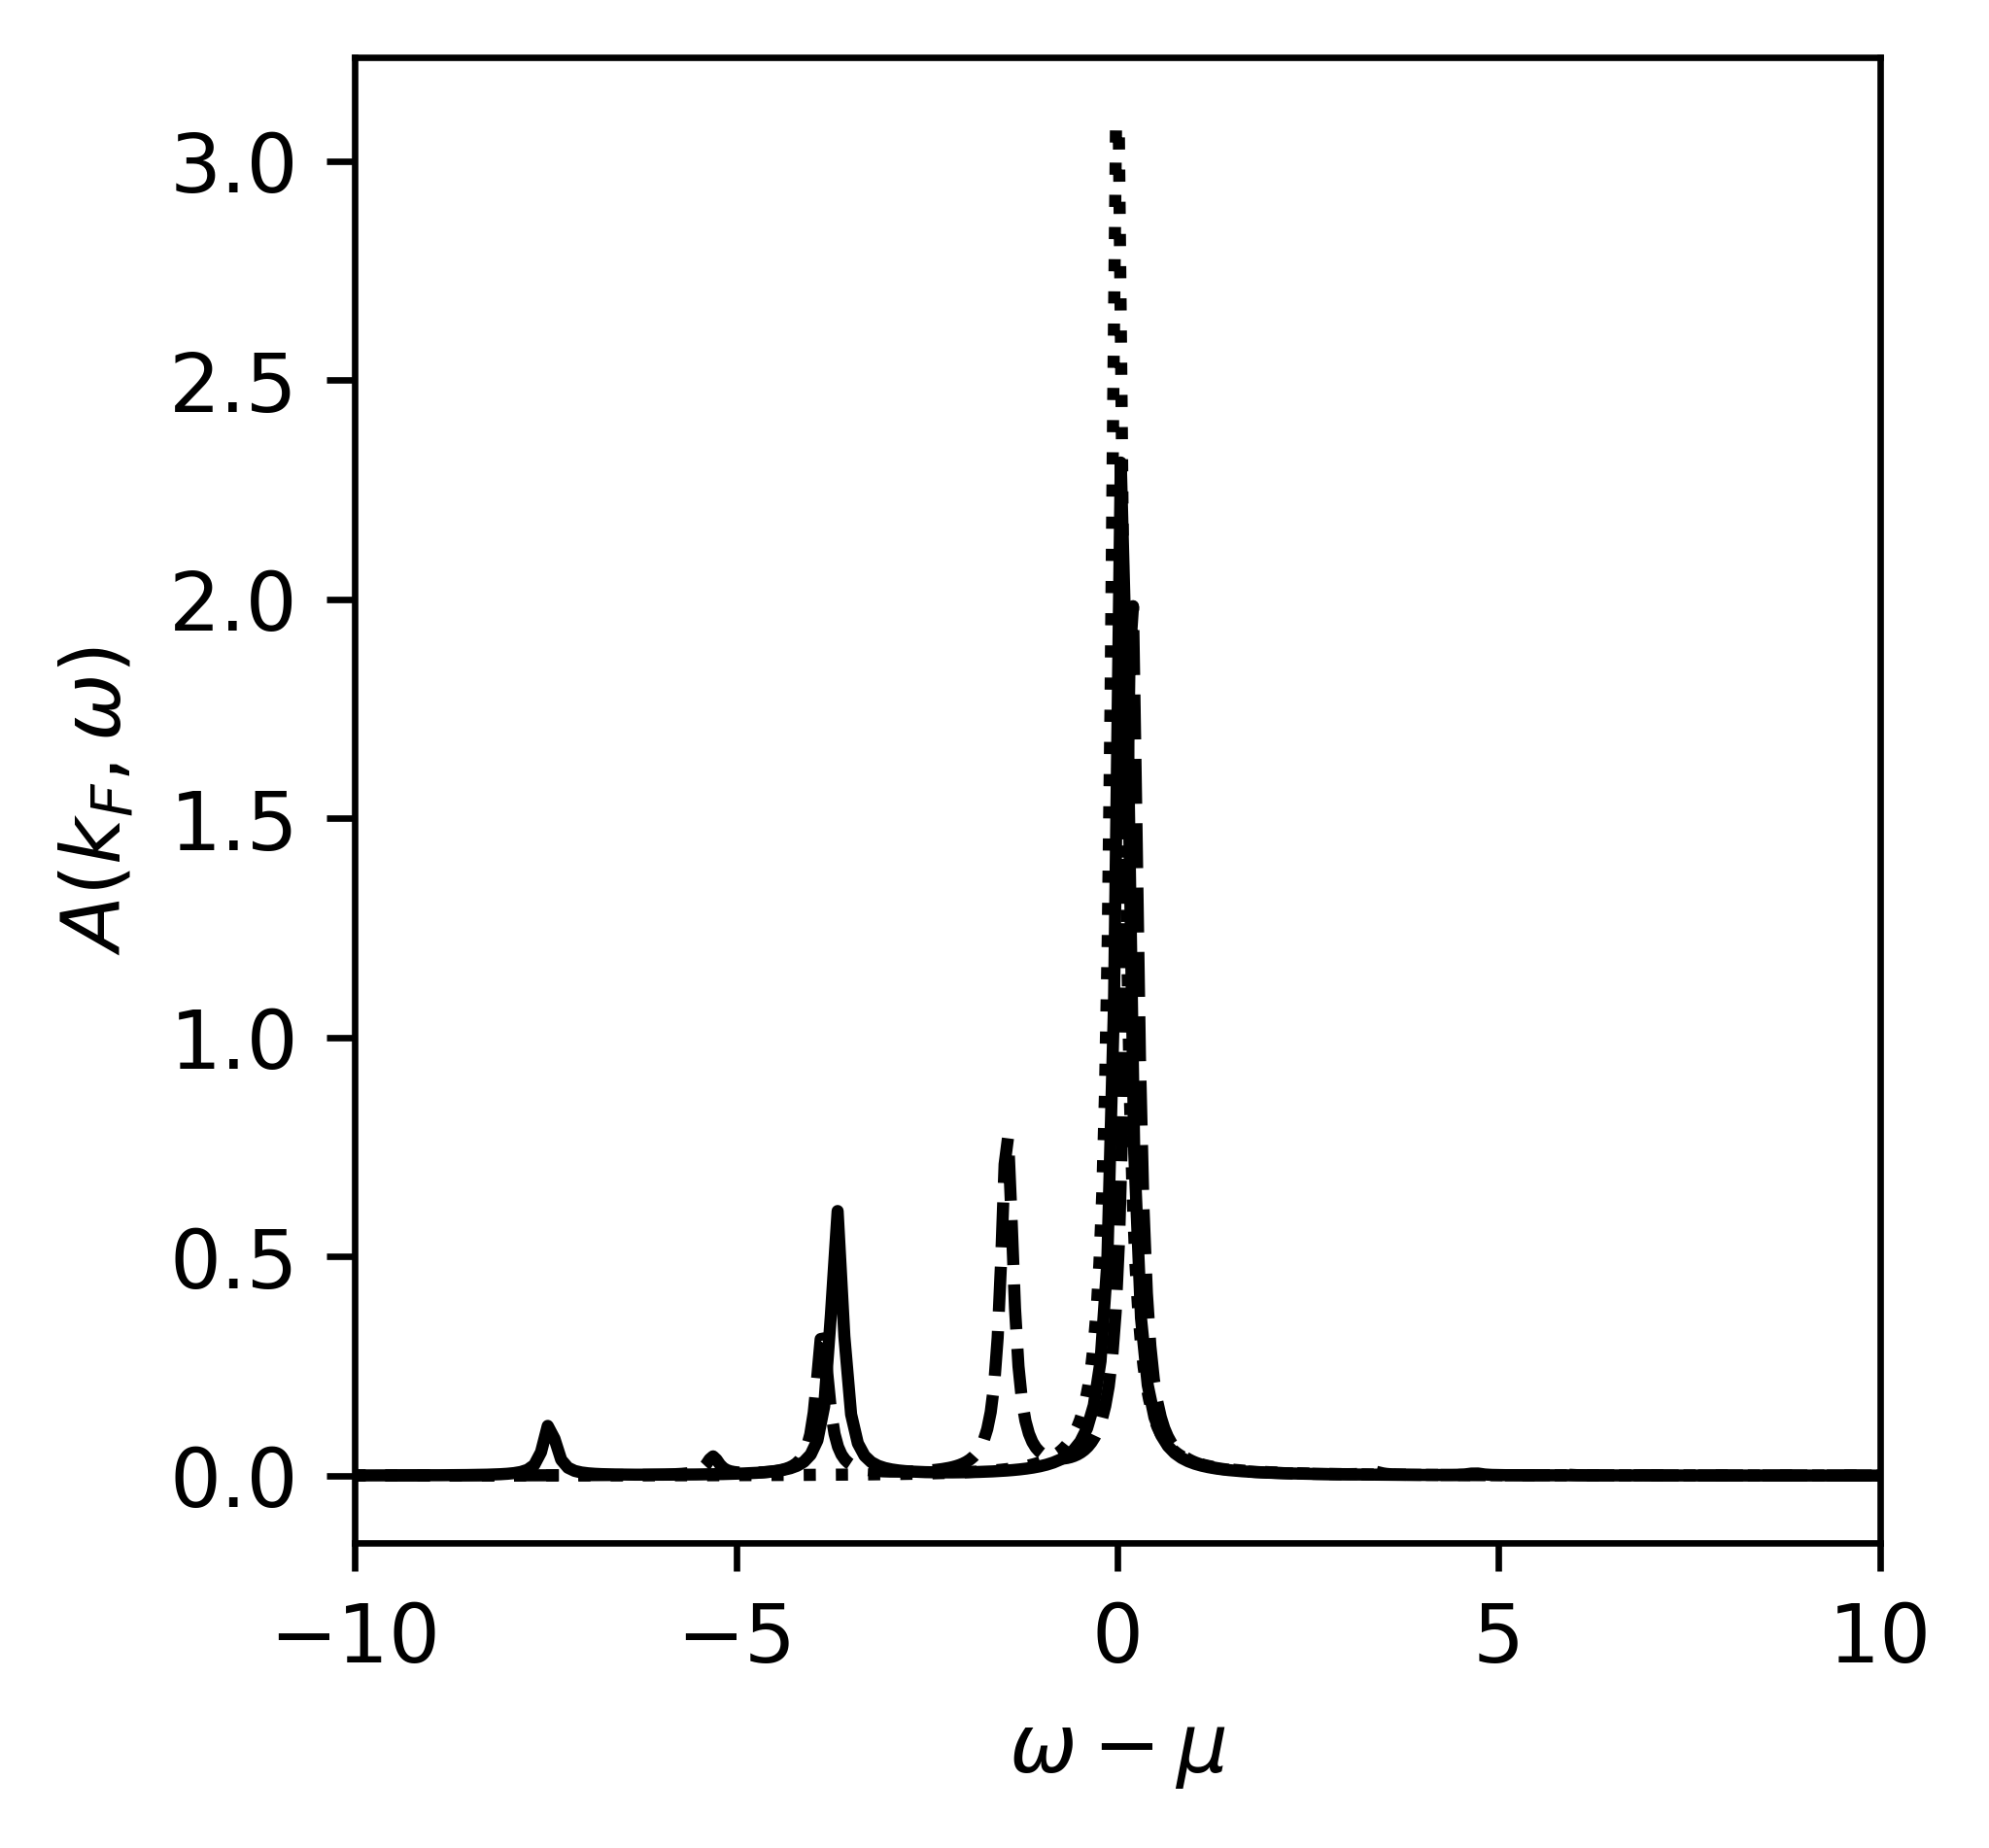

In [6]:

plt.figure(figsize=(3.375, 3.375), dpi=600)

plt.plot(omegas_spin, ap_spin+am_spin, label='Heisenberg', color='black', ls=':')
plt.plot(omegas_pair, ap_pair+am_pair, label='Pairing', color='black', ls='--')
plt.plot(omegas_all, ap_all+am_all, label='All', color='black')

# plt.plot(omegas_pair, ap_dd+am_dd, label='Density')
plt.ylabel(r'$A(k_F,\omega)$')
plt.xlabel(r'$\omega - \mu$')
# plt.legend()
plt.xlim(-10, 10)
# plt.savefig('/Users/wholdhus/Desktop/SO5_Figs/spectral_function_comparison.png', bbox_inches='tight')

## Comparing Normal and Extreme Hamiltonians!

[0.39269908 1.17809725 1.96349541 2.74889357]


 14%|█▎        | 213/1568 [00:00<00:00, 2126.11it/s]

Combined 1 degenerate states
Fermi energy: 6.619780771387266
Creating at 7th spot
<vin|vout>
(0.7704083485611957+0j)
| |vin> - |vout> |
0.0
Equal?
True
Norms
0.8777290860859036
0.8777290860859036
<vin|vout>
(0.2295916514388044+0j)
| |vin> - |vout> |
0.0
Equal?
True
Norms
0.47915723039395364
0.47915723039395364
Finding creation matrix elts.
Finding annihilation matrix elts.


100%|██████████| 1568/1568 [00:00<00:00, 1707.72it/s]


Largest matrix elements: Creation
0.7689752835675309
7
Annihilation
0.19019079949657597
3
[0.39269908 1.17809725 1.96349541 2.74889357]


  0%|          | 0/1568 [00:00<?, ?it/s]

Combined 1 degenerate states
Fermi energy: 5.101454123241503
Creating at 7th spot
<vin|vout>
(0.7849464290766046+0j)
| |vin> - |vout> |
0.0
Equal?
True
Norms
0.8859720249966161
0.8859720249966162
<vin|vout>
(0.21505357092339555+0j)
| |vin> - |vout> |
0.0
Equal?
True
Norms
0.463738688189152
0.46373868818915204
Finding creation matrix elts.
Finding annihilation matrix elts.


100%|██████████| 1568/1568 [00:00<00:00, 1582.10it/s]


Largest matrix elements: Creation
0.784031432746646
6
Annihilation
0.16825190610646001
8


(-15, 15)

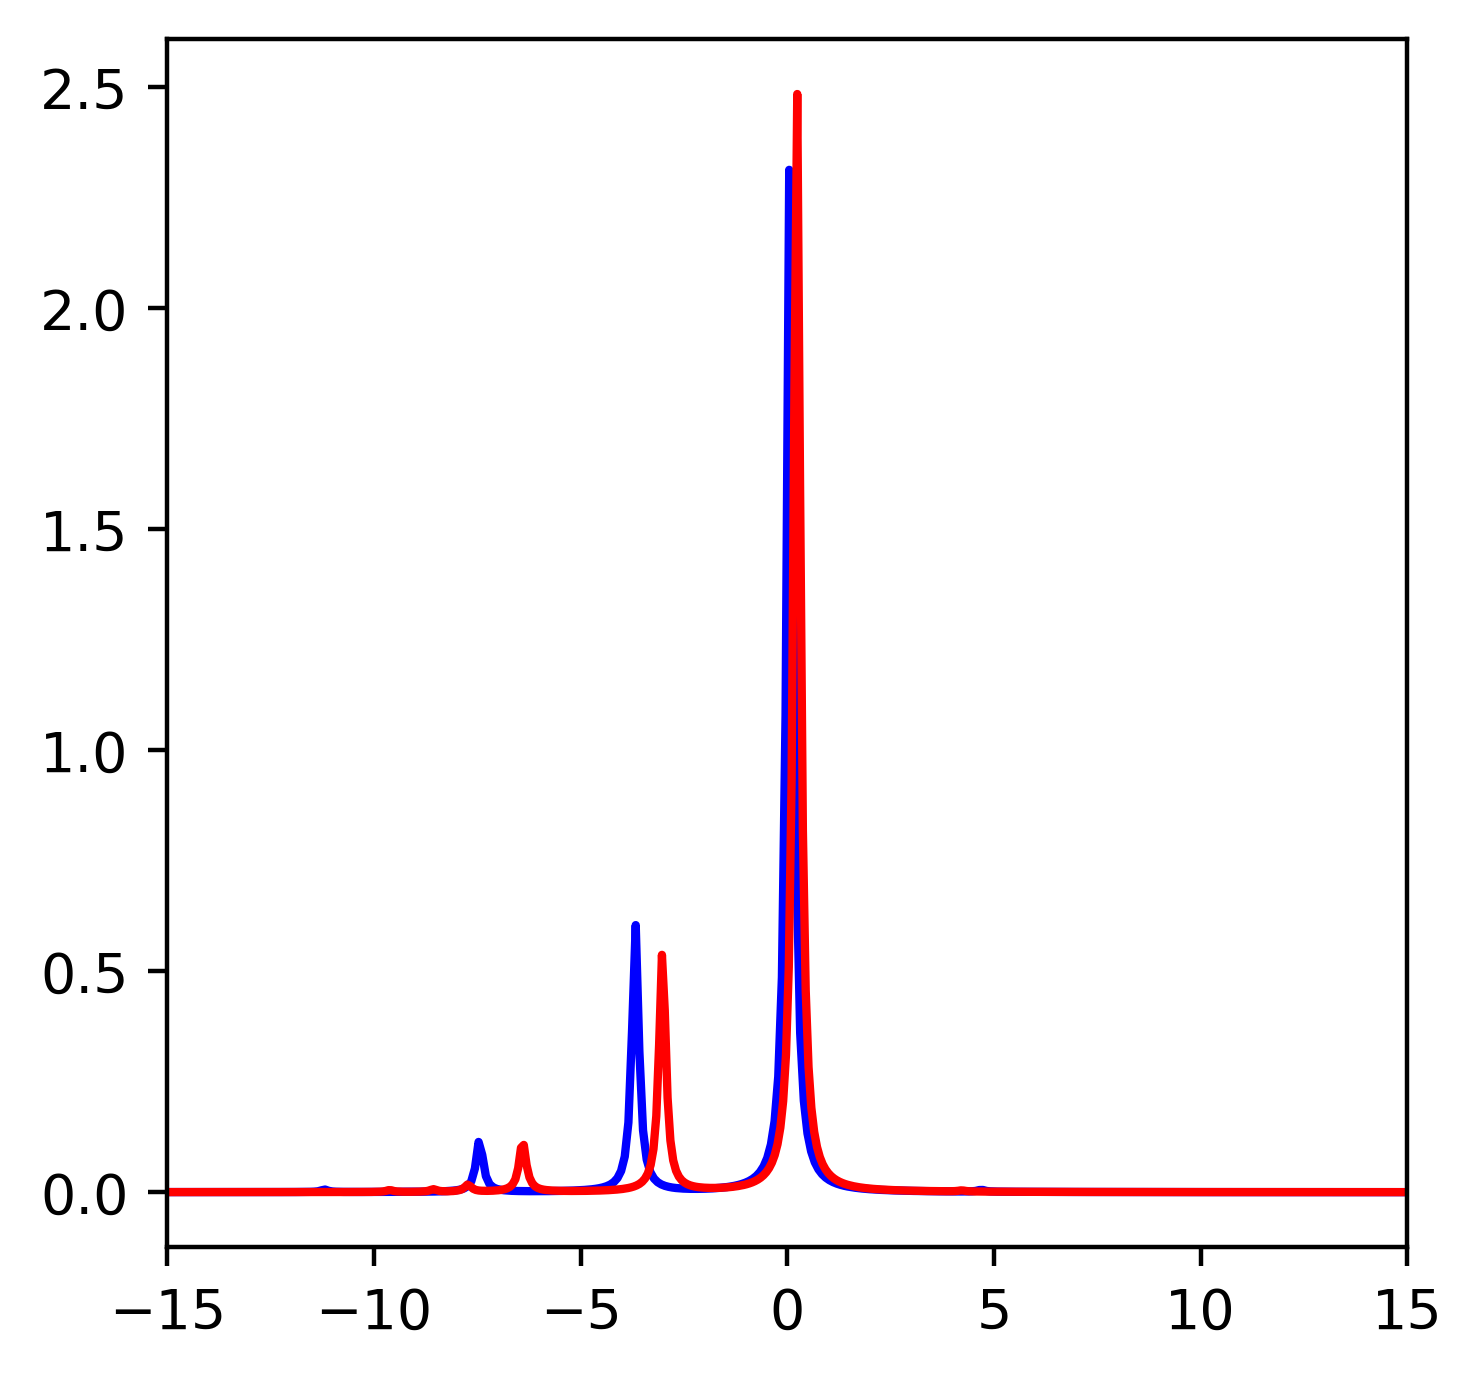

In [23]:
couplings=(1,1,1)

L = 4
N = 12
ks = np.arange(1, 2*L+1, 2)*0.5*np.pi/L

G = -1/np.sum(ks)

eta = .1
kf = L + N//4 -1 

steps=1000

ap_rg, am_rg, omegas_rg, ns = find_spectral_fun(L, N, G, ks, steps=steps, n_states=-999,
                                       eta=eta, couplings=couplings, subtract_ef=True)
ap_fb, am_fb, omegas_fb, ns = find_spectral_fun(L, N, G, ks, steps=steps, n_states=-999,
                                       eta=eta, couplings=couplings, exactly_solvable=False,
                                               subtract_ef=True)
plt.figure(figsize=(4,4), dpi=400)
plt.plot(omegas_rg, ap_rg + am_rg, color='blue')
plt.plot(omegas_fb, ap_fb + am_fb, color='red')
plt.xlim(-15, 15)

## Pairing correlations

We can also look at pairing correlations.

In [8]:
if input('Type C to continue') == 'C':
    print('Ok!')
    from exact_diag import ham_op_2, form_basis, np, pairing_correlation
    import matplotlib.pyplot as plt

    L = 4
    Nup = 2
    Ndown = 2
    G = -10/L
    k = np.arange(1, 2*L+1, 2)*0.5*np.pi/L

    site_a = 1 # Looking at p_{ab} with a fixed to one end of the lattice

    basis = form_basis(2*L, Nup, Ndown)
    h = ham_op_2(L, G, k, basis)
    e, v = h.eigh()
    v0 = v[:,0]
    
    pcs = np.zeros(2*L, dtype=np.complex128) # We can see if there's an unruly imaginary part later
    for site_b in np.arange(1, 2*L+1): # spatial indices of lattice
        print('Site {}'.format(site_b))
    
        pc = pairing_correlation([v0], site_a, site_b, k, basis)
        pcs[site_b - 1] = pc[0]
    plt.plot(np.abs(pcs))
else:
    print('OK')

Type C to continue nop


OK
